In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

In [23]:
earliest_date = session.query(func.min(Measurement.date)).scalar()
earliest_date

'2010-01-01'

In [24]:
total_records = session.query(func.count(Measurement.date)).scalar()
total_records

19550

In [25]:
preview_data = session.query(Measurement.date, Measurement.prcp).limit(25).all()
preview_data

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12)]

In [28]:
print("Measurement Columns:")
for column in Measurement.__table__.columns:
    print(f"{column.name}, {column.type}")

Measurement Columns:
id, INTEGER
station, TEXT
date, TEXT
prcp, FLOAT
tobs, FLOAT


In [29]:
print("Station Columns:")
for column in Station.__table__.columns:
    print(f"{column.name}, {column.type}")

Station Columns:
id, INTEGER
station, TEXT
name, TEXT
latitude, FLOAT
longitude, FLOAT
elevation, FLOAT


In [31]:
# Adjust the query as per your table's relationship and keys
preview_data = session.query(Measurement.date, Measurement.prcp, Station.name).\
    join(Station, Measurement.station == Station.station).limit(25).all()
preview_data


[('2010-01-01', 0.08, 'WAIKIKI 717.2, HI US'),
 ('2010-01-02', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-03', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-04', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-06', None, 'WAIKIKI 717.2, HI US'),
 ('2010-01-07', 0.06, 'WAIKIKI 717.2, HI US'),
 ('2010-01-08', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-09', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-10', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-11', 0.01, 'WAIKIKI 717.2, HI US'),
 ('2010-01-12', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-14', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-15', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-16', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-17', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-18', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-19', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-20', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-21', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-22', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-23', 0.0, 'WAIKIKI 717.2, HI US'),
 ('2010-01-24', 0.01, 'WAIKIKI

In [32]:
unique_stations = session.query(func.count(Station.station.distinct())).scalar()
unique_stations

9

In [33]:
station_counts = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()
station_counts

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [34]:
null_precipitations = session.query(func.count()).\
    filter(Measurement.prcp == None).scalar()
null_precipitations

1447

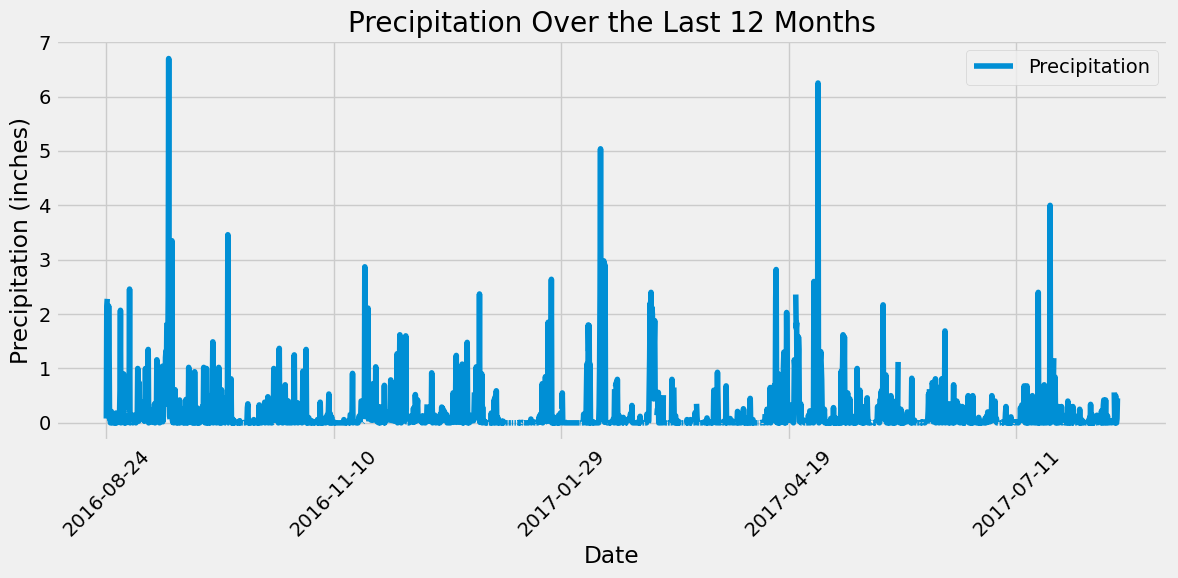

In [36]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(precip_data, columns=['date', 'precipitation'])
df.set_index('date', inplace=True)

# Sort the dataframe by date
df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(12, 6), title='Precipitation Over the Last 12 Months', ylabel='Precipitation (inches)')
plt.xlabel("Date")
plt.legend(["Precipitation"], loc="best")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df['precipitation'].describe()

print(summary_statistics)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

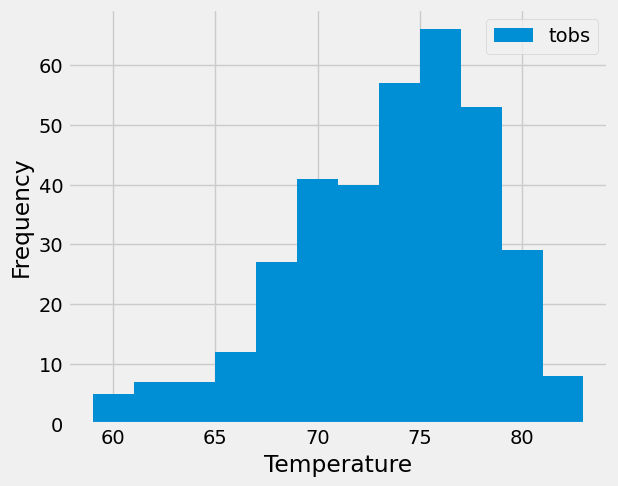

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()